# Laboratorio 1 - Parte 1

### Regresión polinomial múltiple

### 2019 - I

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En este archivo va a encontrar tanto celdas de código como celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer integrante:

Nombre: Joan Sebastian Morales Ocampo
Cedula: 1047971484

#### Segundo integrante:

Nombre: Sebastian Londoño Alvarez
Cedula: 1152445286


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1: Contextualización del problema (1/1)

El problema de *regresión* que abordaremos consiste en predecir el valor de la humedad absoluta en el aire, a partir de varias variables sensadas en el aire (Para más información sobre la base de datos y la contextualización del problema, consulte: http://archive.ics.uci.edu/ml/datasets/air+quality). Ejecute la siguiente celda para cargar los datos.

In [0]:
#cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('DB/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter

#Esta es la base de datos AirQuality del UCI Machine Learning Repository.
X = db[:,0:12]
Y = db[:,12]


#### Responda:

1.1 Cuántas muestras tiene la base de datos?: 




In [0]:
N = np.size(X,0)
print (N)

9357


1.2 Cuántas caracteristicas tiene el problema?: 



In [0]:
d = np.size(X,1)
print (d)

12


**Escriban algo**

<b>Nota</b>: Agregue una celda en la cual incluya las líneas de código usadas para responder las preguntas.

## Ejercicio 2: Completar código (0.8/1)

Analice los siguientes métodos de la teoría vista para los modelos de *regresión polinomial múltiple*, tales como el error cuadrático medio (<font color='blue'>ECM</font>), modelo de regresión múltiple (<font color='blue'>regression</font>), potencia del polinomio (<font color='blue'>potenciaPolinomio</font>) y gradiente descendente. 

Una vez comprenda su funcionamiento proceda a realizar lo siguiente: 
1. Completar el código de la regla de actualización de los parámetros del algoritmo de <font color='blue'>gradiente_descedente</font>: 

$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$ 

2. Graficar el error cuadrático: Error cuadrático medio (ECM) vs. las iteraciones del algoritmo. La gráfica debe llevar título y los correspondientes nombres de los ejes, puedes consultar documentación [aquí](https://matplotlib.org/tutorials/introductory/pyplot.html).

In [0]:
from __future__ import division

#Error cuadrático medio (criterio para el modelo de regresión polinomial)
def ECM(Y_est,Y):
    N = np.size(Y)
    ecm = np.sum((Y_est.reshape(N,1) - Y.reshape(N,1))**2)/(2*N)
    return ecm 

#Modelo Regresión Múltiple
def regression(X, W):
    Yest = np.dot(X,W)    #con np.dot se realiza el producto matricial. Aquí X es dim [Nxd] y W es dim [dx1]
    return Yest           #Esta variable contiene la salida de f(X,W)


#Potencia de polinomio
def potenciaPolinomio(X,grado):
    X2 = X
    
    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)
    
    return X2


"""Gradiente descendente para regresión lineal múltiple
X: Matriz de datos extendida.
W: Vector de parámetros del modelo
eta: Taza de aprendizaje
"""
   
def gradiente_descendente(X,Y,eta):
     
    #Extendemos la matriz de X para el parámetro independiente
    unos = np.array([np.ones(np.size(X,0))])
    #Concatenamos el vector de unos con la matriz X
    X = np.concatenate((unos.T, X), axis=1)
    X = X.reshape(np.size(X,0),np.size(X,1))
    
    Y = Y.reshape(np.size(Y), 1)
    
    #Tomamos el número de variables del problema
    d = np.size(X,1)
    
    #Tomamos el número de muestras de la base de datos
    N = np.size(X,0)
    
    
    #Inicializamos el vector de parámetros 
    W = np.zeros((1,d))
    W = W.reshape(np.size(W), 1)
    
    eta = eta
    
    iteraciones = 500
    ecms = np.zeros(iteraciones)
    
    for iter in range(iteraciones):
        error = ECM(regression(X,W),Y)
        ecms[iter] = error
        
        #Aquí debe completar el código con la regla de actualización de los parámetros W. 
        #Tenga en cuenta los nombres de las variables ya creadas: W, X, Y
        for j in range(d):
            suma = 0
            for i in range(N):
                suma += (np.dot(W.T, X[i, :].T) - Y[i]) * X[i, j]
            W[j] = W[j] - eta * suma / N
        # Se calcula el error cuadrático medio con base  a X, Y, W actualizado
        error = ECM(regression(X, W), Y)
        ecms[iter] = error
        
        
    print ('Vector de parámetros del modelo:\n')
    print (W)
    print ('\nError Final durante el entrenamiento = ' + str(ecms[-1]))
    
    #Aquí debe completar el código para realizar la gráfica de ecms vs. iteraciones
    iteraciones = np.linspace(1, 500, 500)
    plt.title('ecms vs iteraciones')
    plt.xlabel('iteraciones')
    plt.ylabel('ecms')
    plt.plot(iteraciones, ecms, color='green')
    plt.show()
    
    return W
    

**Dónde comprueban que el código funciona?**

## Ejercicio 3: Entrenamiento (1/1)

En este punto debe hacer uso de las funciones escritas en el punto anterior para realizar el proceso de *modelamiento y simulación* de los datos de cargados en el Ejercicio # 1 sobre la predicción del valor de la humedad absoluta en el aire 

A continuación complete el siguiente código llamando a la función <font color='blue'>gradiente_descedente</font> pasandole los parámetros correspondientes (X,y,eta). Debe obtener como salida el vector de parámetros $w$ estimado y la gráfica del error cuadrático medio vs iteraciones.

*Nota*: No olvide definir el grado del polinomio y la taza de aprendizaje (eta)

Vector de parámetros del modelo:

[[-7.13434276]
 [-0.07400147]
 [ 2.87692169]
 [-0.22481694]
 [ 7.72851919]
 [ 0.94943972]
 [-0.4057207 ]
 [ 2.81805872]
 [ 0.26105871]
 [ 0.32017528]
 [ 0.34154942]
 [ 6.17625873]
 [ 5.93978829]
 [-0.07569192]
 [-1.58676459]
 [ 0.18906272]
 [-6.12465562]
 [-1.00626941]
 [ 0.24208009]
 [-1.3980778 ]
 [-0.03271551]
 [-1.08586742]
 [-0.25412185]
 [-5.84185628]
 [-5.4160829 ]]

Error Final durante el entrenamiento = 0.11036575402759395


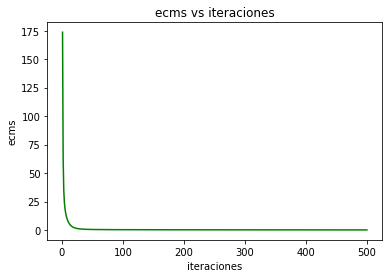


Error durante la prueba = 845.3198976188897


In [0]:
from numpy import random
import math
import numpy.matlib


N = np.size(X,0)

# #Se modifica la matriz de datos original de acuerdo al grado del polinomio ingresado para el modelo
grado = 2
X2 = potenciaPolinomio(X,grado)

#Dejamos algunas muestras para el proceso de entrenamiento y otras para evaluar qué tan bueno fue el aprendizaje del modelo
random.seed(1)
ind=np.random.permutation(N)
Xtrain = X2[ind[0:int(math.ceil(0.7*N))],:]
Xtest = X2[ind[int(math.ceil(0.7*N)):N],:]
Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
Ytest = Y[ind[int(math.ceil(0.7*N)):N]]

#Normalizamos los datos
media = np.mean(Xtrain)
desvia = np.std(Xtrain)
Xtrain = stats.stats.zscore(Xtrain)
Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

eta = 1e-1

#Complete la siguiente línea de código llamando el método gradiente_descendente con sus respectivos argumentos
W = gradiente_descendente(Xtrain, Ytrain, eta)

#Evaluamos las predicciones del modelo con los datos de test
unos = np.array([np.ones(np.size(Xtest,0))])
Xtest = np.concatenate((unos.T, Xtest), axis=1)
Xtest = Xtest.reshape(np.size(Xtest,0),np.size(Xtest,1))
Yest = regression(Xtest, W)
Error = ECM(Yest,Ytest)
print ('\nError durante la prueba = ' + str(Error))

***Ésta no es la función usada en el laboratorio del viernes**

#### Responda:

3.1 ¿Cuál es el número de coeficientes $w$ que se obtienen al ingresar un polinomio de grado 4? ¿Por qué?:
* El número de coeficientes de W que se obtiene para un polinómio de grado 4 es 49, lo cual corresponde a doce coeficientes por cada vector X y un coeficiente para el término independiente $$ f(x,{\bf{w}} ) = w_0 + w_1 X +  w_2 X^2 + w_3 X^3 + w_4 X^4$$ 



3.2 La funci&oacute;n polin&oacute;mica que se est&aacute; usando para grados mayores a 1
est&aacute; incompleta, ¿Por qu&eacute;?:
* La función resultante que no incluye los términos son los terminos cruzados $x_1x_2^2$ ...

## Ejercicio 4: Obtener resultados (0/1)

Identifique la variable "eta" (tasa de aprendizaje $\eta$) en el código anterior, cambie su valor de acuerdo a la siguiente tabla. Haga lo mismo con el valor del grado del polinomio y complete las columnas ECM_Entrenamiento y ECM_Prueba.

Tenga en cuenta que cuando el valor de $\eta$ sea $0.00001$ y el grado del polinomio sea $1$, el valor del ECM de prueba debe ser $703.376$. Esto le servirá de criterio de verificación para la implementación de su algorítmo de gradiente descendente.


In [0]:
import numpy as np
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Tasa de aprendizaje' : pd.Series(['1e-5', '1e-5', '1e-5', '1e-5', '1e-5', '1e-3', '1e-3', '1e-3', '1e-3', '1e-3', '1e-1', '1e-1', '1e-1', '1e-1', '1e-1']),
    'Grado del polinomio' : pd.Series([1,2,3,4,5,1,2,3,4,5,1,2,3,4,5])})
df_types["ECM_Entrenamiento"] = ""
df_types["ECM_Prueba"] = ""
df_types.set_index(['Tasa de aprendizaje','Grado del polinomio'], inplace=True)
df_types["ECM_Entrenamiento"][0] = "774.055"
df_types["ECM_Prueba"][0] = "703.376"
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [0]:
qgrid_widget.get_changed_df()

ECM_Entrenamiento  \
Tasa de aprendizaje Grado del polinomio                         
1e-5                1                                 774.055   
                    2                       748.0650199329715   
                    3                       724.8281620841035   
                    4                       703.2141392035185   
                    5                        682.618236994124   
1e-3                1                       47.29527684830529   
                    2                      19.369835798422308   
                    3                       13.51182461520417   
                    4                      11.329200038805741   
                    5                      10.468907336782845   
1e-1                1                      0.9227684951432751   
                    2                      0.1103657540275942   
                    3                     0.04780332693437483   
                    4                    0.024716351580914724   
                    5                     0.02813775021868516   

                                                 ECM_Prueba  
Tasa de aprendizaje Grado del polinomio                      
1e-5                1                               703.376  
                    2                     709.8818828072049  
                    3                     709.8473166611931  
                    4                     711.3701531480207  
                    5                     711.4026416401626  
1e-3                1                    432.36244848825163  
                    2                     666.8547928838403  
                    3                     715.0872818014203  
                    4                     716.5566416177581  
                    5                     711.3664458640579  
1e-1                1                    1337.7484636331963  
                    2                     845.3198976188901  
                    3                     685.3369170531051  
                    4                     674.3636159960561  
                    5                     679.1952705182399

## Ejercicio 5: Pruebas (0.2/1)

En la celda de código del Ejercicio # 3, comente la línea donde se normalizan las matrices de datos Xtrain y Xtest. Realice pruebas para diferentes valores de $\eta$ y de grado del polinomio de manera similar a los valores que usó en el punto 3. Observe que pasa con el ECM.

#### Responda

4.1 Qué sucede con los valores del ECM?
* Los valores de ECM se convierten en nan. 



4.2 A qué se debe lo que observa?
* El problema anterior se debe al error "overflow encountered in square" lo cual nos indica que es un valor que se sale del rango permitido para un tipo de dato float64.


4.3 ¿Qu&eacute; proceso hace la normalizaci&oacute;n sobre los datos? Consulte por qu&eacute; es necesaria la normalizaci&oacute;n en el modelo de regresi&oacute;n log&iacute;stica y cu&aacute;les son los tipos de normalizaci&oacute;n m&aacute;s comunes. ¿Cu&aacute;l de ellos se aplic&oacute; en el laboratorio?
* EL proceso de normalización comprime o extiende los valores de los datos de entrada a un rango de valores definido, para el caso en particular los comprime.
 * La normalización de los datos es necesaria para reducir la redundancia y ajustar el conjuntos de datos.  Los principales métodos para la normalización de datos son:
 * * Normalización Min Max
 * * Normalización Z-score
 * * Normalizado por escala decimal
 * Para el caso en particular se ha empleado la ténica de normalización Standard score o Z-score, la cual se muestra a continuación:
  $$ X_{normalized} = \frac{X - X_{mean}}{X_{stddev}} $$

**¿Dónde esá el código que soporte la respuesta?**

**Éste no es el taller del laboratorio de los viernes**